# HW 10 - KELLY "SCOTT" SIMS

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

**Question 14.1**

The breast cancer data set breast-cancer-wisconsin.data.txt from
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/ (description at
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 ) has missing values.
1. Use the mean/mode imputation method to impute values for the missing data.
2. Use regression to impute values for the missing data.
3. Use regression with perturbation to impute values for the missing data.
4. (Optional) Compare the results and quality of classification models (e.g., SVM, KNN) build using
(1) the data sets from questions 1,2,3;
(2) the data that remains after data points with missing values are removed; and
(3) the data set when a binary variable is introduced to indicate missing values.


In [340]:
columns = ['id_number', 'clump_thick', 'cell_size' , 'cell_shape' , 'marginal_adhesion', 
           'single_epithelial_size','bare_nuclei','bland_chromatin', 'normal_nucleoli','mitoses', 'class']
df = pd.read_csv('breast-cancer-wisconsin.data.txt', header=None, names=columns)
df.head()

,id_number,clump_thick,cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id_number                 699 non-null int64
clump_thick               699 non-null int64
cell_size                 699 non-null int64
cell_shape                699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


It appears that all columns are of type integer except **bare_nuclei**. Since it is of type "object", it must have some values other than integers representative of missing values. Let's inspect a little further

In [342]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

There is a question mark used as a placeholder for missing values. Let's see all instances of these missing values.

In [343]:
print(len(df[df.bare_nuclei == '?']))
df[df.bare_nuclei == '?']

16


,id_number,clump_thick,cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


There are 16 missing values in the bare_nuclei column. We impute using mean/mode method first

# 1. Mean/Mode Imputation
------------------
The reason why it is the "mean/mode" imputation is because the method you use is dependent on the distribution of values for that feature. Mean is very sensitive to skew and outlier. Because of this, it should only be used when the distribution is normal. Anything but normal, then we should use the mode. Let's check the distribution of bare_nuclei

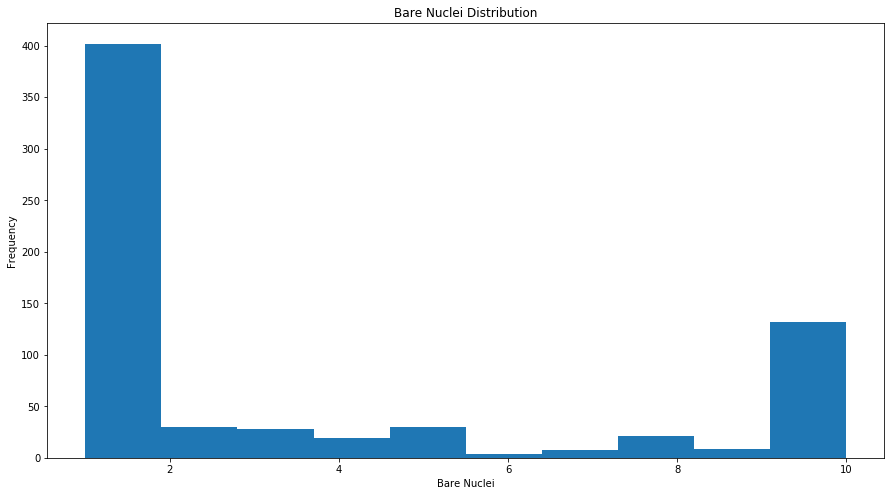

In [344]:
df[df.bare_nuclei != '?'].bare_nuclei.astype('int').plot(kind = 'hist', figsize = (15,8), title = 'Bare Nuclei Distribution')
plt.xlabel('Bare Nuclei')
plt.show()

It's very clear that Bare Nuclei is not normally distributed. Therefore, we will use the mode

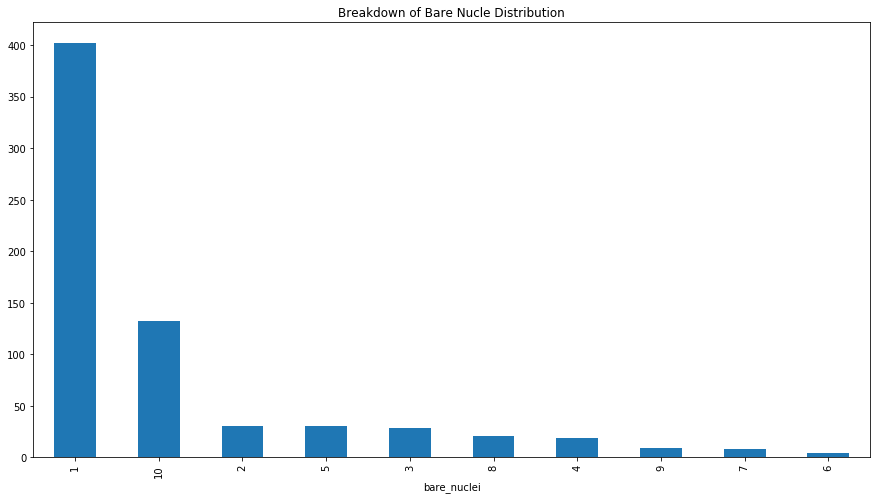

In [345]:
df[df.bare_nuclei !='?'].groupby('bare_nuclei', as_index = False)['class']\
                        .count().sort_values('class',ascending =False)\
                        .set_index('bare_nuclei')\
                        .plot(kind = 'bar', 
                              title = 'Breakdown of Bare Nucle Distribution', 
                              figsize=(15,8), 
                              legend=False)
plt.show()

It's clear that 1 is the mode. This is the value we will use for the imputation

In [563]:
mode_df = df.copy()
mode_df['bare_nuclei'] = df.bare_nuclei.replace('?', 1).astype('int')

In [564]:
mode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id_number                 699 non-null int64
clump_thick               699 non-null int64
cell_size                 699 non-null int64
cell_shape                699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null int64
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


We have imputed all the missing values and now all of our columns are integers as well

# 2. Use Regression to Impute

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

First we need to remove those observations where data is missing

In [512]:
train_df = df.copy()
unknown_df = df.copy()

train_df = df[df.bare_nuclei !='?']
unknown_df = df[df.bare_nuclei == '?']

In [507]:
unknown_df.head()

,id_number,clump_thick,cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


We have our train data and our test data. Next we need separate the training data into train and validation sets while removing the target variable **bare_nuclei** and the ultimate variable being predicted **class**. We need to remove class because training a model with knowledge of what the ultimate variable interest is, is known as **Data Leakage**, and we don't want to train such a model. Finally, we can remove id_number since the identification of a patient should bear no weight on the classification of a tumor. Conversely, depending on the data, it could also be a form of data leakage. If a particular ID number is represented more than once in a data set, it might lead to bias if that particular ID is ever predicted upon again.

In [513]:
#Remove the target class and ultimate class to avoid data leakage
X_train = train_df[[x for x in df.columns if x not in ['class', 'bare_nuclei', 'id_number']]]
y_train = train_df['bare_nuclei']

#Perform the same procedure for the data that needs to be predicted upon
X_unknown = unknown_df[[x for x in unknown_df.columns if x not in ['class', 'bare_nuclei', 'id_number']]]

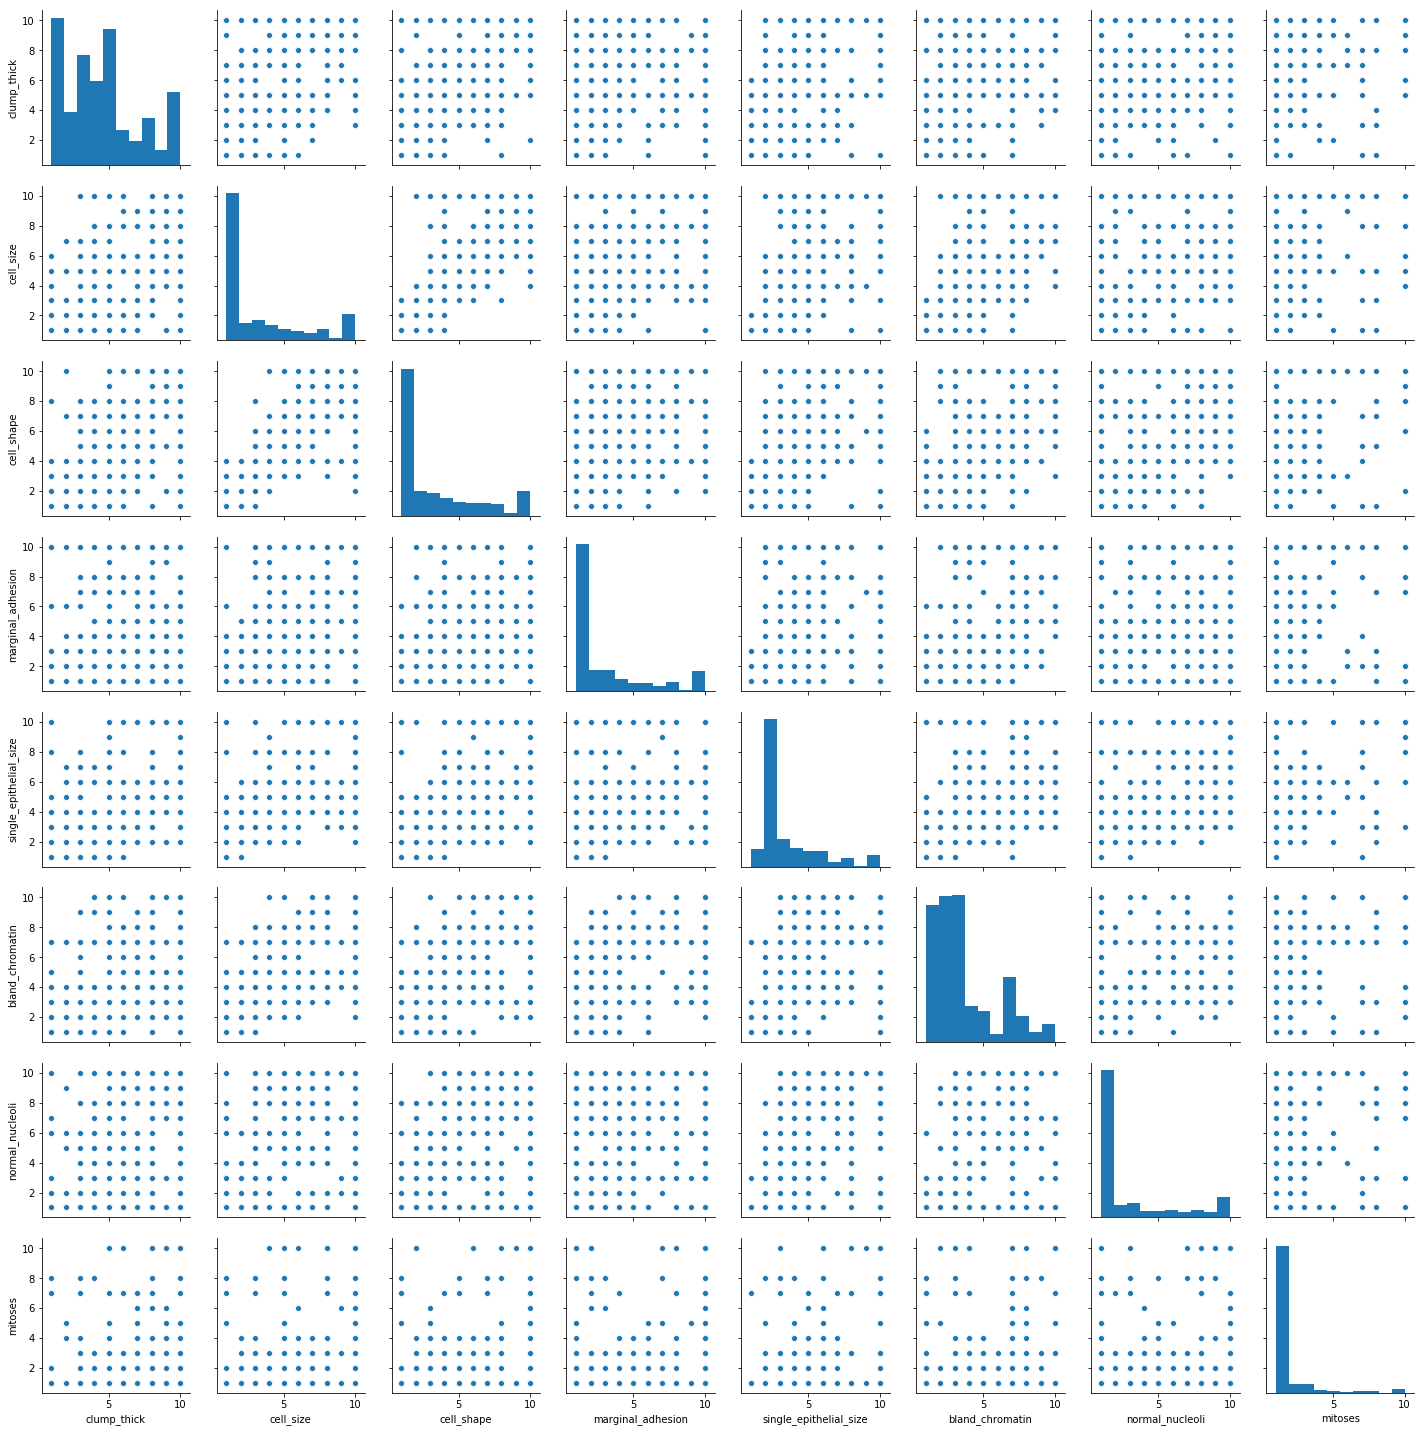

In [463]:
sns.pairplot(X_train)
plt.show()

There appears to be strong correlation betweel **cell_shape** and **cell_size**. Let's see how strong of a correlation it is

In [464]:
print('Pearson Correlation factor between cell shape and size: {}'.format(X_train.corr().loc['cell_size', 'cell_shape']))

Pearson Correlation factor between cell shape and size: 0.9072282331914379


just as anticipated, there is a high correlation between **cell_shape** and **cell_size**. As a sanity check, let's see all correlation values

In [465]:
X_train.corr()

,clump_thick,cell_size,cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses
clump_thick,1.000000,0.642481,0.653470,0.487829,0.523596,0.553742,0.534066,0.350957
cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.755559,0.719346,0.460755
cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.735344,0.717963,0.441258
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.668567,0.603121,0.418898
single_epithelial_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.618128,0.628926,0.480583
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,1.000000,0.665602,0.346011
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.665602,1.000000,0.433757
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.346011,0.433757,1.000000


There's relatively high correlation between **cell_size** and **single_epithelial_size** as well as **bland_chromatin** and **normal_nucleoli**. Conversely, with **cell_shape**, there's relatively high correlation wih **single_epithelial_size**, **bland_chromatin** and **normal_nucleoli**. Let's progress by dropping **cell_shape** since it had 90% correlation with **cell_size**. By dropping that feature, that automatically drops the corresponding high correlations with the other features.

In [509]:
X_train = X_train[[x for x in X_train.columns if x not in ['cell_shape']]]
X_unknown = X_unknown[[x for x in X_unknown.columns if x not in ['cell_shape']]]

In [510]:
X_train.head()

,clump_thick,cell_size,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,2,3,1,1
1,5,4,5,7,3,2,1
2,3,1,1,2,3,1,1
3,6,8,1,3,3,7,1
4,4,1,3,2,3,1,1


In [511]:
X_unknown.head()

,clump_thick,cell_size,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses
23,8,4,1,2,7,3,1
40,6,6,9,6,7,8,1
139,1,1,1,1,2,1,1
145,1,1,1,2,2,1,1
158,1,1,1,3,1,1,1


In [469]:
#Perform a 70/30 train - validate split
train, val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

Now that we have prepared our data by removing the target variable from the training data, scaling the data, and splitting the training data into 60% training set and 40% validation set, we can now tune a regression model

In [447]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [448]:
lm = LinearRegression()
lr = Ridge(alpha = 0.1)
ls = Lasso(alpha = 0.1)

In [449]:
lm.fit(train, y_train)
lr.fit(train, y_train)
ls.fit(train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [450]:
print('TRAINING DATA R^2 SCORE')
print('-----------------------')
print('Linear Regression Model: {} R^2'.format(lm.score(train,y_train)))
print('Ridge Linear Regression: {} R^2'.format(lr.score(train,y_train)))
print('Lasso Linear Regression: {} R^2'.format(ls.score(train,y_train)))

TRAINING DATA R^2 SCORE
-----------------------
Linear Regression Model: 0.5930626354976749 R^2
Ridge Linear Regression: 0.593062635341173 R^2
Lasso Linear Regression: 0.5926503963396388 R^2


In [451]:
print('VALIDATION DATA R^2 SCORE')
print('-------------------')
print('Linear Regression Model: {} R^2'.format(lm.score(val, y_val)))
print('Ridge Linear Regression: {} R^2'.format(lr.score(val,y_val)))
print('Lasso Linear Regression: {} R^2'.format(ls.score(val,y_val)))

VALIDATION DATA R^2 SCORE
-------------------
Linear Regression Model: 0.6208451201327663 R^2
Ridge Linear Regression: 0.6208448338570569 R^2
Lasso Linear Regression: 0.6193526481579414 R^2


Ridge regression and normal linear regression appear to be performing the best intially. Let's predict on the unknown data and compare predicitons amongst all 3 models

In [452]:
regression_predictions = [round(x) for x in lm.predict(X_unknown)]
ridge_predictions = [round(x) for x in lr.predict(X_unknown)]
lasso_predictions = [round(x) for x in ls.predict(X_unknown)]

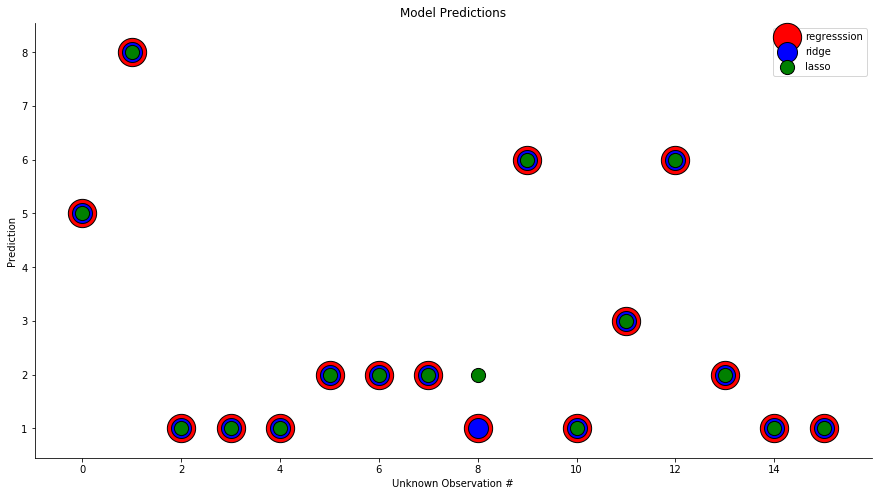

In [453]:
plt.subplots(nrows=1, ncols =1, figsize = (15,8))
ax = plt.subplot(111)
ax.scatter(range(len(regression_predictions)), regression_predictions, color = 'r', label='regresssion', s = 800, edgecolors ='k')
ax.scatter(range(len(regression_predictions)), ridge_predictions, color = 'b', label = 'ridge', s = 400, edgecolors = 'k')
ax.scatter(range(len(regression_predictions)), lasso_predictions, color = 'g', label = 'lasso' , s = 200, edgecolors = 'k')
plt.legend()
plt.title('Model Predictions')
plt.xlabel('Unknown Observation #')
plt.ylabel('Prediction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


For the most part, it appears that all 3 models agree on predictions for the missing values. Only the LASSO model dissagress with the other two models on 4 instances of the 16 observations. Since the predictions being made are values between 1 and ten, this is could be treated as a multiclass classifcation problem. Real quick, let's just fit a random forest model and see what results it gives us

In [387]:
from sklearn.ensemble import RandomForestClassifier

In [388]:
clf = RandomForestClassifier(n_estimators=500, max_features=3)

In [389]:
clf.fit(train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [390]:
from sklearn.metrics import confusion_matrix, classification_report

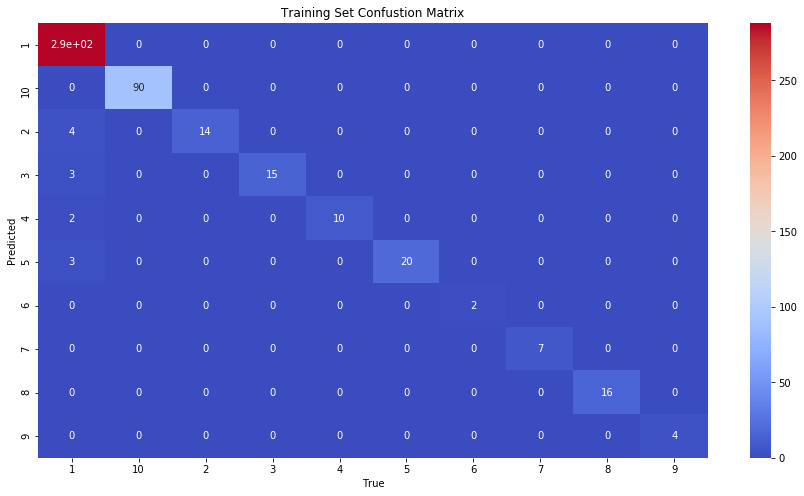

In [391]:
plt.figure(figsize = (15,8))
sns.heatmap(confusion_matrix(y_train, clf.predict(train)), annot = True, cmap = 'coolwarm')
plt.xticks(np.arange(10) + 0.5, [1,10,2,3,4,5,6,7,8,9])
plt.yticks(np.arange(10) + 0.5, [1,10,2,3,4,5,6,7,8,9])
plt.title('Training Set Confustion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [392]:
print(classification_report(y_train, clf.predict(train)))

             precision    recall  f1-score   support

          1       0.96      1.00      0.98       288
         10       1.00      1.00      1.00        90
          2       1.00      0.78      0.88        18
          3       1.00      0.83      0.91        18
          4       1.00      0.83      0.91        12
          5       1.00      0.87      0.93        23
          6       1.00      1.00      1.00         2
          7       1.00      1.00      1.00         7
          8       1.00      1.00      1.00        16
          9       1.00      1.00      1.00         4

avg / total       0.98      0.97      0.97       478



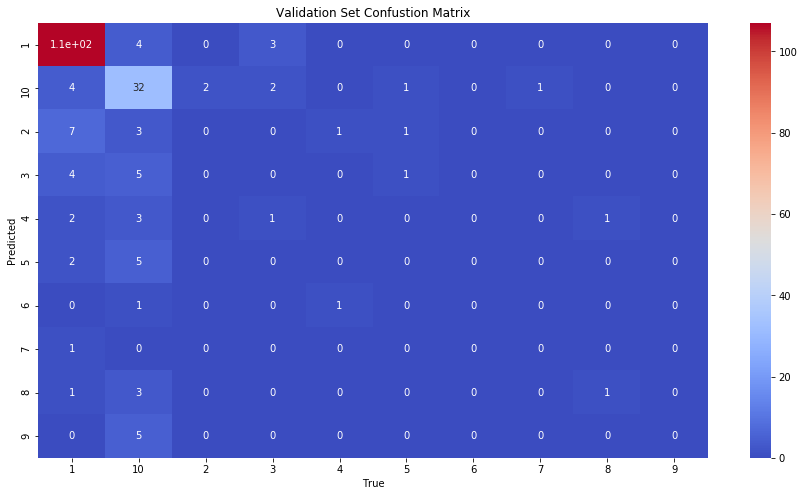

In [393]:
plt.figure(figsize = (15,8))
sns.heatmap(confusion_matrix(y_val, clf.predict(val)), annot = True, cmap = 'coolwarm')
plt.xticks(np.arange(10) + 0.5, [1,10,2,3,4,5,6,7,8,9])
plt.yticks(np.arange(10) + 0.5, [1,10,2,3,4,5,6,7,8,9])
plt.title('Validation Set Confustion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [458]:
print(classification_report(y_val, clf.predict(val)))

             precision    recall  f1-score   support

          1       0.84      0.94      0.88       114
         10       0.52      0.76      0.62        42
          2       0.00      0.00      0.00        12
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         1
          8       0.50      0.20      0.29         5
          9       0.00      0.00      0.00         5

avg / total       0.58      0.68      0.63       205



The Random Forest Classifier unfortunately severely overfit the training data. When the model was optimized to reduce high variance, the performance for both the training and validation set greatly attenuated. Let's continue using only our ridge regression model. We will use the original dataframe, filter it by the rows that have the ? symbol, and feed those rows into our trained model to make a prediction. We will then update the original dataframe with those predicted rows

In [459]:
predicted = df[df.bare_nuclei == '?']
display(predicted.bare_nuclei)
predicted['bare_nuclei'] = predicted.loc[:, [x for x in df.columns if x not in ['class', 
                                                                                'bare_nuclei', 
                                                                                'id_number',
                                                                                'cell_shape']]]. \
apply(lambda x: int(round(lr.predict(np.array(x).reshape(1,-1))[0])), axis = 1)
display(predicted.bare_nuclei)

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: bare_nuclei, dtype: object

23     5
40     8
139    1
145    1
158    1
164    2
235    2
249    2
275    1
292    6
294    1
297    3
315    6
321    2
411    1
617    1
Name: bare_nuclei, dtype: int64

In [460]:
regression_df = predicted.combine_first(df)

# REGRESSION WITH PERTURBATION

For regression with Perturbation, we could perturb the dependent variable and train a model to fit the perturbed labeled classes, or we could perturb one to all of the features in the training set. Let's perform the latter and perturb all the training features by using numpy's **random** module

In [482]:
from numpy import random

Create a function that when passed a value will perturb that value by a value chosen from the random uniform distribution. The uniform function will be bound from a minimum of 0.01 and a maximum of 0.5

In [483]:
def perturb_data(x):
    random_perturbation_value = random.uniform(0.01, 0.5)
    return x + random_perturbation_value

In [514]:
X_perturbed = X_train.applymap(perturb_data).drop('cell_shape', axis = 1)
X_unknown = X_unknown.drop('cell_shape', axis =1)

In [515]:
X_perturbed.head()

,clump_thick,cell_size,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses
0,5.150864,1.081866,1.060537,2.433456,3.069821,1.063825,1.174128
1,5.415497,4.190781,5.368362,7.276969,3.403928,2.045791,1.377286
2,3.290998,1.269518,1.453180,2.356982,3.294174,1.468491,1.020592
3,6.277502,8.389768,1.459068,3.488128,3.239609,7.453250,1.473643
4,4.260226,1.444531,3.241891,2.207681,3.392368,1.197347,1.463228


Create the train and validation sets

In [516]:
#Perform a 70/30 train - validate split
train, val, y_train, y_val = train_test_split(X_perturbed, y_train, test_size=0.30, random_state=42)

In [517]:
lm = LinearRegression()
lr = Ridge(alpha = 0.1)
ls = Lasso(alpha = 0.1)

In [518]:
lm.fit(train, y_train)
lr.fit(train, y_train)
ls.fit(train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [519]:
print('TRAINING DATA R^2 SCORE')
print('-----------------------')
print('Linear Regression Model: {} R^2'.format(lm.score(train,y_train)))
print('Ridge Linear Regression: {} R^2'.format(lr.score(train,y_train)))
print('Lasso Linear Regression: {} R^2'.format(ls.score(train,y_train)))

TRAINING DATA R^2 SCORE
-----------------------
Linear Regression Model: 0.5934230664771337 R^2
Ridge Linear Regression: 0.5934230663131856 R^2
Lasso Linear Regression: 0.5929464766716372 R^2


In [520]:
print('VALIDATION DATA R^2 SCORE')
print('-------------------')
print('Linear Regression Model: {} R^2'.format(lm.score(val, y_val)))
print('Ridge Linear Regression: {} R^2'.format(lr.score(val,y_val)))
print('Lasso Linear Regression: {} R^2'.format(ls.score(val,y_val)))

VALIDATION DATA R^2 SCORE
-------------------
Linear Regression Model: 0.6181635785395408 R^2
Ridge Linear Regression: 0.6181634698420793 R^2
Lasso Linear Regression: 0.6167314019153769 R^2


In [521]:
perturbed_regression_predictions = [round(x) for x in lm.predict(X_unknown)]
perturbed_ridge_predictions = [round(x) for x in lr.predict(X_unknown)]
perturbed_lasso_predictions = [round(x) for x in ls.predict(X_unknown)]

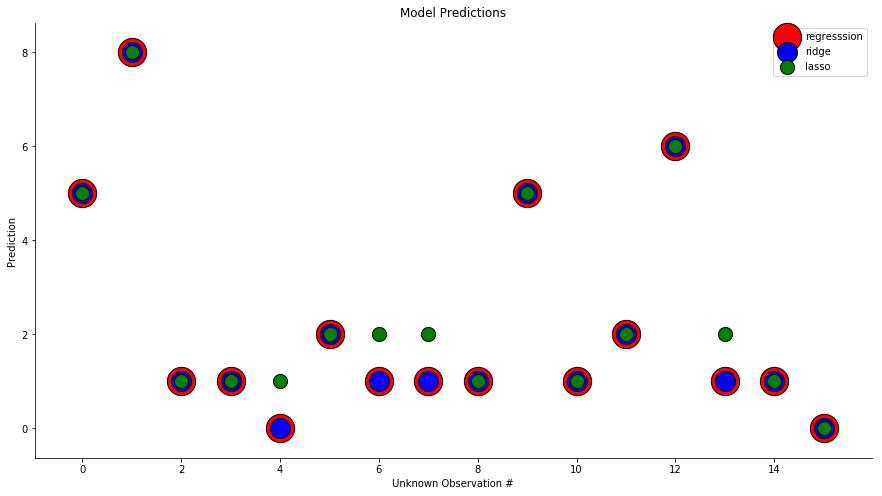

In [522]:
plt.subplots(nrows=1, ncols =1, figsize = (15,8))
ax = plt.subplot(111)
ax.scatter(range(len(regression_predictions)), perturbed_regression_predictions, color = 'r', label='regresssion', s = 800, edgecolors ='k')
ax.scatter(range(len(regression_predictions)), perturbed_ridge_predictions, color = 'b', label = 'ridge', s = 400, edgecolors = 'k')
ax.scatter(range(len(regression_predictions)), perturbed_lasso_predictions, color = 'g', label = 'lasso' , s = 200, edgecolors = 'k')
plt.legend()
plt.title('Model Predictions')
plt.xlabel('Unknown Observation #')
plt.ylabel('Prediction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

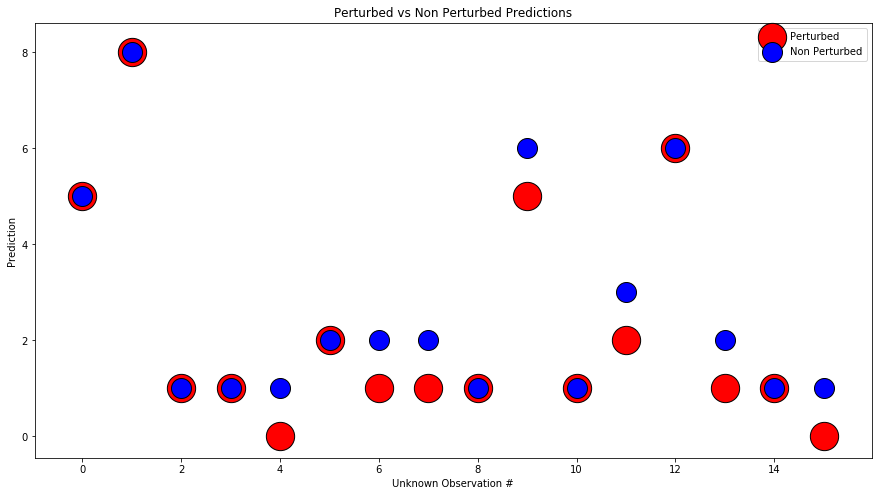

In [523]:
plt.figure(figsize = (15,8))
plt.scatter(range(len(regression_predictions)), perturbed_regression_predictions, color = 'r', edgecolors='k', label='Perturbed', s = 800)
plt.scatter(range(len(regression_predictions)), regression_predictions, color = 'b', edgecolors='k', label = 'Non Perturbed', s = 400)
plt.title('Perturbed vs Non Perturbed Predictions')
plt.xlabel('Unknown Observation #')
plt.ylabel('Prediction')
plt.legend()
plt.show()

The perturbed vs non perturbed models are relatively similar. Where they disagree is, the difference is only by 1. 

In [526]:
perturbed = df[df.bare_nuclei == '?']
display(perturbed.bare_nuclei)
perturbed['bare_nuclei'] = perturbed.loc[:, [x for x in df.columns if x not in ['class', 
                                                                                'bare_nuclei', 
                                                                                'id_number',
                                                                                'cell_shape']]]. \
apply(lambda x: int(round(lr.predict(np.array(x).reshape(1,-1))[0])), axis = 1)
display(perturbed.bare_nuclei)

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: bare_nuclei, dtype: object

23     5
40     8
139    1
145    1
158    0
164    2
235    1
249    1
275    1
292    5
294    1
297    2
315    6
321    1
411    1
617    0
Name: bare_nuclei, dtype: int64

In [527]:
perturbed_df = perturbed.combine_first(df)

# KNN MODEL USING VALUES FROM 1, 2, AND 3

In [540]:
def prep_df(df):
    df['class'] = df['class'].replace(2,0).replace(4,1)
    y = df['class']
    df = df.drop(['class', 'cell_shape', 'id_number'], axis = 1)
    return df, y

In [528]:
from sklearn.neighbors import KNeighborsClassifier

In [558]:
models = {}

In [544]:
clf = KNeighborsClassifier(n_neighbors = 4)

In [565]:
mode_df , y = prep_df(mode_df)
regression_df , y = prep_df(regression_df)
perturbed_df, y = prep_df(perturbed_df)

In [566]:
def neighbor_model(df, y, clf, impute_type):
    
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
    
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    
    test_score = clf.score( X_test, y_test)
    
    models[impute_type] = {'Train Score': train_score, 'Test Score': test_score}
    print('******************** IMPUTATION METHOD: "{}" ********************'.format(impute_type))
    
    print('TRAINING SET METRICS\n')
    print(classification_report(y_train, clf.predict(X_train)))
    
    print('\nTEST SET METRICS\n')
    print(classification_report(y_test, clf.predict(X_test)))

In [567]:
neighbor_model(mode_df, y, clf, 'MODE')

******************** IMPUTATION METHOD: "MODE" ********************
TRAINING SET METRICS

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       304
        1.0       0.97      0.93      0.95       164

avg / total       0.97      0.97      0.97       468


TEST SET METRICS

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       154
        1.0       0.97      0.92      0.95        77

avg / total       0.97      0.97      0.97       231



In [569]:
neighbor_model(regression_df, y, clf, 'REGRESSION')

******************** IMPUTATION METHOD: "REGRESSION" ********************
TRAINING SET METRICS

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97       304
        1.0       0.96      0.93      0.95       164

avg / total       0.96      0.96      0.96       468


TEST SET METRICS

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       154
        1.0       0.97      0.92      0.95        77

avg / total       0.97      0.97      0.97       231



In [570]:
neighbor_model(perturbed_df, y, clf, 'PERTUBATION')

******************** IMPUTATION METHOD: "PERTUBATION" ********************
TRAINING SET METRICS

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97       304
        1.0       0.96      0.93      0.95       164

avg / total       0.96      0.96      0.96       468


TEST SET METRICS

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       154
        1.0       0.97      0.92      0.95        77

avg / total       0.97      0.97      0.97       231



In [571]:
models

{'MODE': {'Train Score': 0.967948717948718, 'Test Score': 0.9653679653679653},
 'REGRESSION': {'Train Score': 0.9636752136752137,
  'Test Score': 0.9653679653679653},
 'PERTUBATION': {'Train Score': 0.9636752136752137,
  'Test Score': 0.9653679653679653}}

In [573]:
pd.DataFrame(models).T

,Test Score,Train Score
MODE,0.965368,0.967949
REGRESSION,0.965368,0.963675
PERTUBATION,0.965368,0.963675


### CONCLUSION
-------------------
It appears that all three models are performing very well for both the training and test set. The Mode imputation method however is providing just a little better accuracy on the Train set. 

# Question 15.1
------------------
Describe a situation or problem from your job, everyday life, current events, etc., for which optimization
would be appropriate. What data would you need?

With Amazon taking over the world in online retail, it is undoubtedly in their best interest to optimize their shipping business model. A good optimization problem could be determining how many products to ship from factory to each warehouse, or from each factory to each warehouse and direct to each end customer, to minimize shipping cost while meeting warehouse demands and not exceeding factory supplies. Data would be:

* Shipping Cost per distance from warehouse
* Shipping Cost per distance from factory
* Factory supply churn rate
* Warehouse capacity
* Factory Supplies Cost